In [12]:
import math
from numpy import linspace
from numpy import allclose
from matplotlib import pyplot as plt

1. Implement Horner's Algorithm:

In [3]:
#An algorithm to simplify calculating polynomials at a point x

#coef: a list of coefficients starting from the nth 
#n: the degree of the polynomial
#x: the point to evaluate the polynomial at
def horner(coef, n, x) :
    result = coef[0]
    
    for i in range(1,n):
        result = result*x + coef[i]
    
    return result


In [4]:
poly = [2, -6, 2, -1] 
x = 3
n = len(poly) 
  
horner(poly, n, x)

5

$p_1(x) = x^9−18x^8+ 144x^7−672x^6+ 2016x^5−4032x^4+ 5376x^3−4608x^2+ 2304x−512$<br>
$p_2(x) = (x-2)^9$

 2. Generate 8000 equally spaced points in the interval [1.92, 2.08].  Evaluate and plot p1(x) at each point in the interval. 

In [5]:
x = linspace(1.92, 2.08, num=8000)
print(x[0], x[1], x[2], x[3], len(x))
y1 = [(a-2)**9 for a in x]

1.92 1.9200200025003125 1.920040005000625 1.9200600075009375 8000


In [6]:
p2coef = [1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512]

y2 = [horner(p2coef, len(p2coef), a) for a in x]

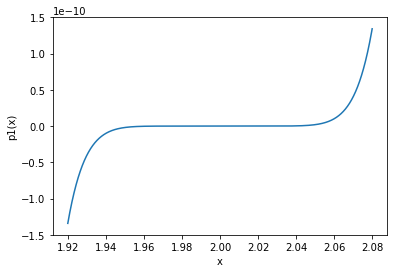

In [7]:
plt.plot(x, y1)
plt.ylim([-1.5*10**(-10), 1.5*10**(-10)])
plt.xlabel("x")
plt.ylabel("p1(x)")
plt.show()

3. In a separate figure, evaluate and plot p2(x) using Horner’s algorithm.  In exact arithmetic, these should be the same.   What’s going on in these plots?


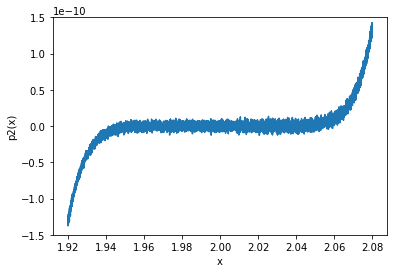

In [8]:
plt.plot(x, y2)
plt.ylim([-1.5*10**(-10), 1.5*10**(-10)])
plt.xlabel("x")
plt.ylabel("p2(x)")
plt.show()

In [18]:
def hornertest(coef, n, x) :
    result = coef[0]
    
    for i in range(1,n):
        if allclose(result*x, -coef[i], rtol=1e-05, atol=1e-08):
            print(result*x, coef[i])
        result = result*x + coef[i]
    
    return result

test = [hornertest(p2coef, len(p2coef), a) for a in x[0:10]]

511.99999999986875 -512
511.9999999998625 -512
511.99999999986795 -512
511.99999999986284 -512
511.9999999998641 -512
511.99999999986557 -512
511.9999999998717 -512
511.99999999986625 -512
511.9999999998645 -512
511.99999999986903 -512


When evaluating p2(x) in the neighborhood of x = 2 the result is approximately 0, which we can see from $p_1(x) = (x - 2)^9 = p_2(x)$.  Because the final coefficient is already negative, the final calculation in the algorithm will always be subtracting two nearly equal numbers which results in much higher error calculations.  


4.  Implement f1 and f2.  Make a table of your implementations evaluated at the points $x_k = 10^{-k}$ for k = 0,1,...,12.  You should see that f1 loses all accuracy as k increases (that is, as $x_k$ approaches zero), while f2 retains its accuracy.  Explain why.

In [20]:
x_k = [10**-k for k in range(0, 13)]

def f1(x):
    return (1-math.cos(x))/(math.sin(x)**2)

def f2(x):
    return 1/(1+math.cos(x))


In [21]:
print("    x          f1                     f2   ")
for x in x_k:
    print("{:.2e}".format(x)," ","{:.8e}".format(f1(x)),"  ","{:.8e}".format(f2(x)))

    x          f1                     f2   
1.00e+00   6.49223205e-01    6.49223205e-01
1.00e-01   5.01252086e-01    5.01252086e-01
1.00e-02   5.00012500e-01    5.00012500e-01
1.00e-03   5.00000125e-01    5.00000125e-01
1.00e-04   4.99999999e-01    5.00000001e-01
1.00e-05   5.00000041e-01    5.00000000e-01
1.00e-06   5.00044450e-01    5.00000000e-01
1.00e-07   4.99600361e-01    5.00000000e-01
1.00e-08   0.00000000e+00    5.00000000e-01
1.00e-09   0.00000000e+00    5.00000000e-01
1.00e-10   0.00000000e+00    5.00000000e-01
1.00e-11   0.00000000e+00    5.00000000e-01
1.00e-12   0.00000000e+00    5.00000000e-01


Again, in f1 as x approaches 0, cos(x) approaches one so we approach a subtraction of nearly equal numbers.  This calculation does seem to be different because f1 has some minor error for k = 4-7 and then drops off completely after that.  